**This notebook is used as a preliminary work for the exploratory data analysis. The main code is provided separately and an extensive explanation of the prediction tasks should be found in the `README.md` file of the project folder.**

# 1. Libraries and data loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
import random


In [12]:
df = pd.read_csv("/home/cherubin/Desktop/personal/woven/data/raw/woven_data.tsv", sep='\t')

In [6]:
graph_path='/home/cherubin/Desktop/personal/woven/reports/figures/'

figure_name = plt.title.get_text()
plt.savefig(graph_path+figure_name + '.png')

In [277]:
df.head(5)

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,Japan,20,Juurou,Hayashi,10.578594,True,False,True,NaN
1,Male,Japanese,Japan,22,Ryūji,Yamasaki,7.814520,False,False,True,NaN
2,Male,Japanese,Japan,27,Ryūnosuke,Inoue,4.213682,False,False,True,NaN
3,Male,Japanese,Japan,24,Shin,Kobayashi,NaN,False,False,True,NaN
4,Female,Japanese,Japan,21,Ran,Ono,3.248907,False,False,False,NaN


In [137]:
df.columns

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes'],
      dtype='object')

In [138]:
print(df['pass'].value_counts())

False    2665
True     2335
Name: pass, dtype: int64


In [7]:
# Analyzing demographic details of people most likely to pass
passing_df = df[df['pass'] == True]  # Subset of data where pass = 1
non_passing_df = df[df['pass'] == False]


# 2. EDA

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
sex              5000 non-null object
lang             5000 non-null object
country          5000 non-null object
age              5000 non-null int64
first            5000 non-null object
last             5000 non-null object
hours_studied    3018 non-null float64
dojo_class       5000 non-null bool
test_prep        5000 non-null bool
pass             5000 non-null bool
notes            772 non-null object
dtypes: bool(3), float64(1), int64(1), object(6)
memory usage: 327.2+ KB


In [ ]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

notes            84.56
hours_studied    39.64
pass              0.00
test_prep         0.00
dojo_class        0.00
last              0.00
first             0.00
age               0.00
country           0.00
lang              0.00
sex               0.00
dtype: float64

In [ ]:
passing_df.describe()

,age,hours_studied
count,2335.000000,1418.000000
mean,26.651392,5.468335
std,8.019050,3.442488
min,18.000000,0.322662
25%,20.000000,2.946803
50%,24.000000,4.642625
75%,31.000000,7.347131
max,50.000000,24.259314


In [172]:
# Check the data types of each attribute
print(df.dtypes)

# Proportion of people who passed the test
pass_rate = df['pass'].mean()
print("Pass Rate:", pass_rate)

# Demographic analysis
demographic_analysis = passing_df[['sex', 'lang', 'country', 'age']].describe()
print(demographic_analysis)

sex               object
lang              object
country           object
age                int64
first             object
last              object
hours_studied    float64
dojo_class          bool
test_prep           bool
pass                bool
notes             object
dtype: object
Pass Rate: 0.467
               age
count  2335.000000
mean     26.651392
std       8.019050
min      18.000000
25%      20.000000
50%      24.000000
75%      31.000000
max      50.000000


In [198]:
gender = df.groupby(['sex']).count()
percentages= (gender/len(df))*100
print(percentages)

         lang  country    age  first   last  hours_studied  dojo_class  \
sex                                                                      
Female  25.62    25.62  25.62  25.62  25.62          15.80       25.62   
Male    74.38    74.38  74.38  74.38  74.38          44.56       74.38   

        test_prep   pass  notes  
sex                              
Female      25.62  25.62   4.08  
Male        74.38  74.38  11.36  


In [201]:
gender = passing_df.groupby(['sex', 'pass']).count()
percentages= (gender/len(passing_df))*100
print(percentages)

                  lang    country        age      first       last  \
sex    pass                                                          
Female True  15.546039  15.546039  15.546039  15.546039  15.546039   
Male   True  84.453961  84.453961  84.453961  84.453961  84.453961   

             hours_studied  dojo_class  test_prep      notes  
sex    pass                                                   
Female True       9.678801   15.546039  15.546039   2.569593  
Male   True      51.049251   84.453961  84.453961  12.633833  


In [200]:
gender

,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
sex,,,,,,,,,,
Female,363,363,363,363,363,226,363,363,363,60
Male,1972,1972,1972,1972,1972,1192,1972,1972,1972,295


In [204]:
gender = df['sex'].value_counts()

# Print the counts
print((gender/len(df)*100))

Male      74.38
Female    25.62
Name: sex, dtype: float64


In [205]:
gender = passing_df['sex'].value_counts()

# Print the counts
print((gender/len(passing_df)*100))

Male      84.453961
Female    15.546039
Name: sex, dtype: float64


In [209]:
gender = df['country'].value_counts()

# Print the counts
print((gender/len(df)*100))

Japan          80.44
Italy           2.90
USA             2.80
Australia       2.68
New Zealand     2.62
France          2.56
UK              2.46
Mexico          1.46
Spain           1.18
Finland         0.90
Name: country, dtype: float64


In [208]:
gender = passing_df['country'].value_counts()

# Print the counts
print((gender/len(passing_df)*100))

Japan          80.299786
USA             3.083512
New Zealand     2.783726
France          2.698073
Australia       2.655246
Italy           2.612420
UK              2.483940
Mexico          1.541756
Spain           1.113490
Finland         0.728051
Name: country, dtype: float64


Encode non numerical attributes

In [13]:
gender_mapping= {'Male': 1, 'Female': 0}

df['sex'] = df['sex'].map(gender_mapping)

encoder = LabelEncoder()

# List of columns to apply Label Encoding
columns_to_encode = ['country', 'lang']

# Apply Label Encoding to the specified columns
for column in columns_to_encode:
  df[column] = encoder.fit_transform(df[column])

# Proportion of people who passed the test
pass_rate = df['pass'].mean()
print("Pass Rate:", pass_rate)

# Demographic analysis
demographic_analysis = passing_df[['sex', 'lang', 'country', 'age', 'hours_studied','dojo_class', 'test_prep', ]].describe()
print(demographic_analysis)

Pass Rate: 0.467
               age  hours_studied
count  2335.000000    1418.000000
mean     26.651392       5.468335
std       8.019050       3.442488
min      18.000000       0.322662
25%      20.000000       2.946803
50%      24.000000       4.642625
75%      31.000000       7.347131
max      50.000000      24.259314


/tmp/ipykernel_449364/3882611539.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['hours_studied'].dropna(), color='purple')
/tmp/ipykernel_449364/3882611539.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'].dropna(), color='purple')
/tmp/ipykernel_449364/3882611539.py:15: Use

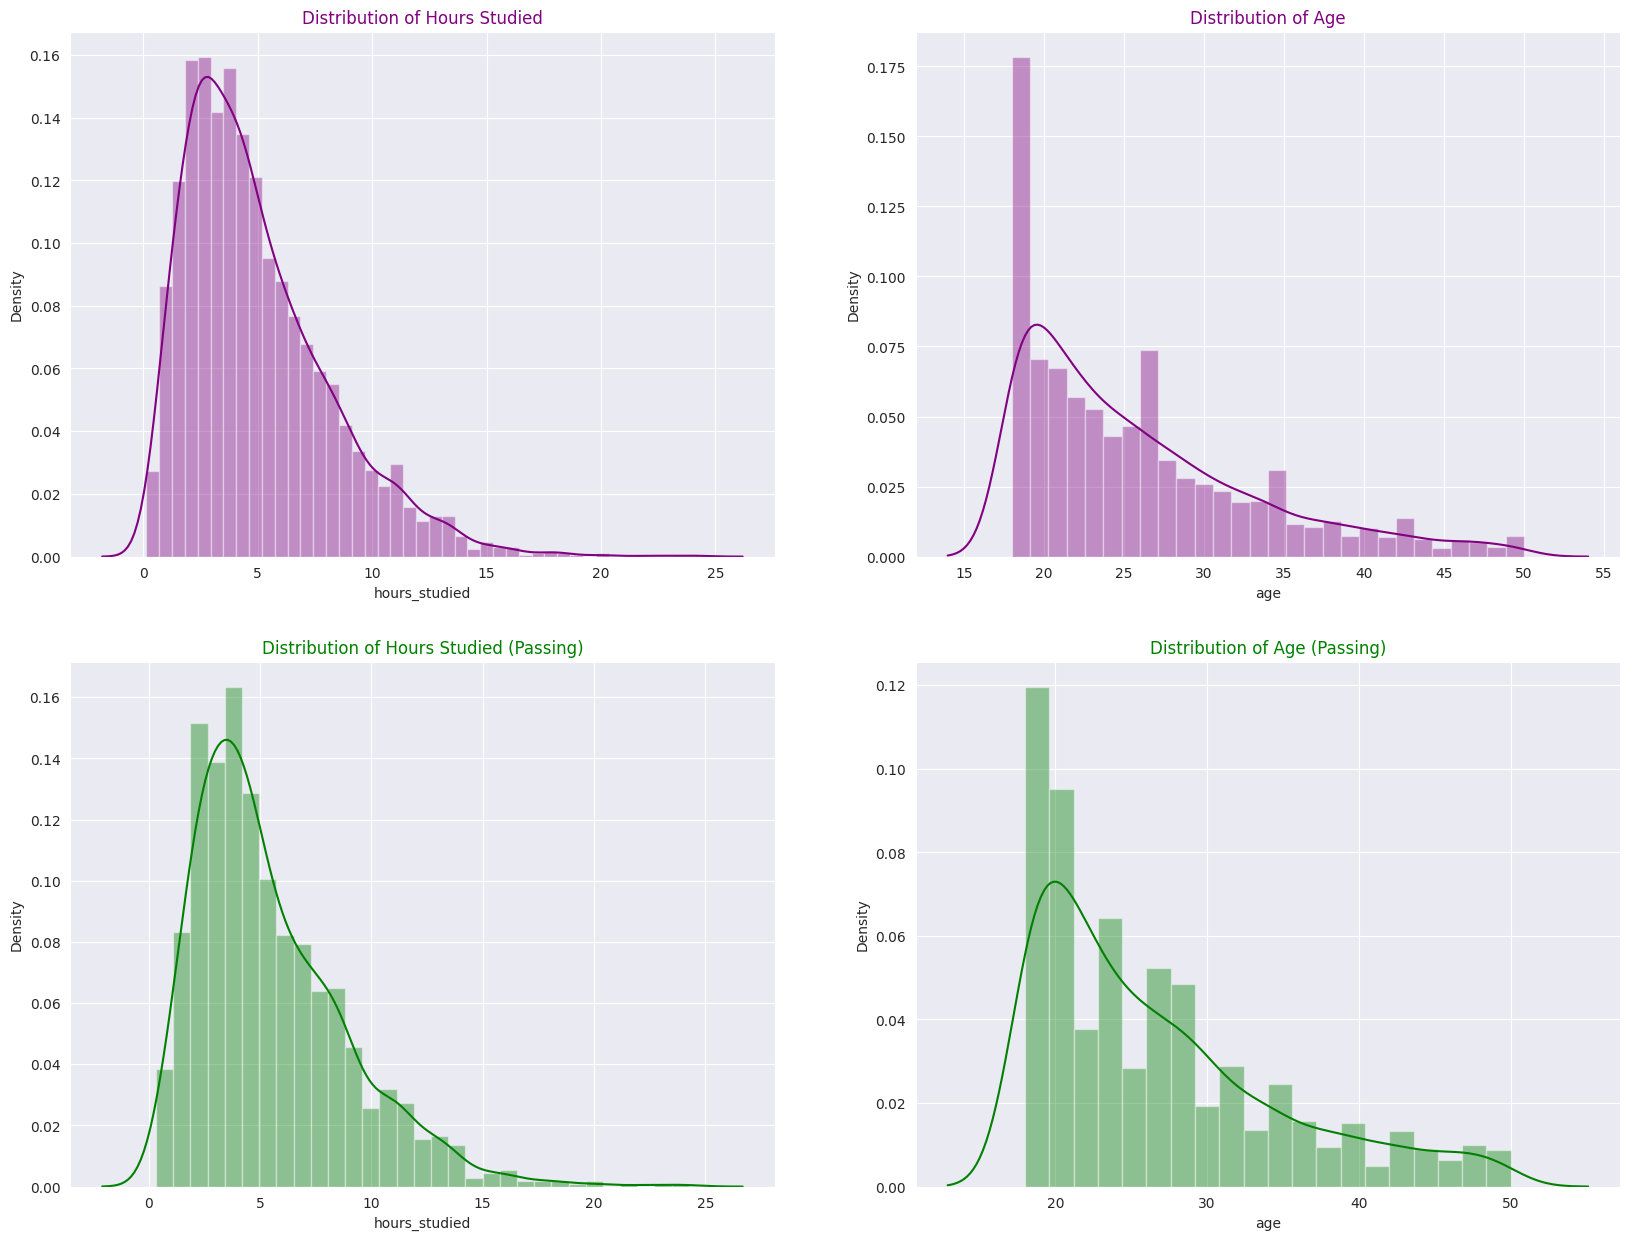

Average study hours of People Who Passed: 5.468334695578225
Overall Average Study hours: 4.964076155049936 

Average age of People Who Passed: 26.65139186295503
Overall Average age: 25.8734


<Figure size 640x480 with 0 Axes>

In [21]:
# Value counts

plt.figure(figsize=[20,15])
sns.set_style('darkgrid')

plt.subplot(2,2,1)
sns.distplot(df['hours_studied'].dropna(), color='purple')
plt.title('Distribution of Hours Studied', color='purple')

plt.subplot(2,2,2)
sns.distplot(df['age'].dropna(), color='purple')
plt.title('Distribution of Age', color='purple')

plt.subplot(2,2,3)
sns.distplot(passing_df['hours_studied'].dropna(), color='g')
plt.title('Distribution of Hours Studied (Passing)', color='green')

plt.subplot(2,2,4)
sns.distplot(passing_df['age'].dropna(), color='g')
plt.title('Distribution of Age (Passing)', color='green')

plt.show()

# Average age and study hours
print("Average study hours of People Who Passed:", passing_df['hours_studied'].mean())
print("Overall Average Study hours:", df['hours_studied'].mean(),"\n")


print("Average age of People Who Passed:", passing_df['age'].mean())
print("Overall Average age:", df['age'].mean())

#save the figure
figure_name = 'Distribution of Age and Study hours'
plt.savefig(graph_path+figure_name + '.png')

/tmp/ipykernel_449364/3846628982.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(passing_df['age'], color='g')


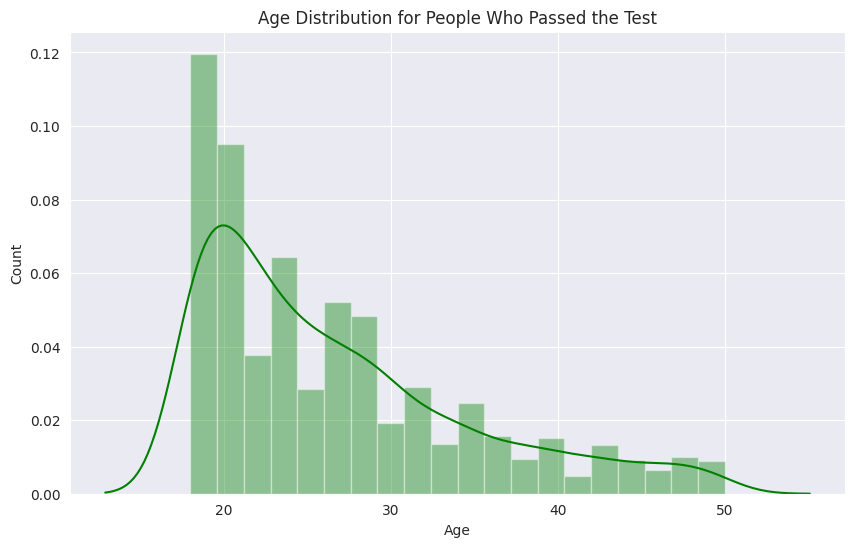

Average Age of People Who Passed: 26.65139186295503
Overall Average Age: 25.8734


<Figure size 640x480 with 0 Axes>

In [22]:
# Histogram of age for people who passed the test
plt.figure(figsize=[10,6])
sns.distplot(passing_df['age'], color='g')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for People Who Passed the Test')
plt.show()

# Average age of people who passed
passing_avg_age = passing_df['age'].mean()
overall_avg_age = df['age'].mean()
print("Average Age of People Who Passed:", passing_avg_age)
print("Overall Average Age:", overall_avg_age)

#save the figure
figure_name = 'Age Distribution for People Who Passed the Test'
plt.savefig(graph_path+figure_name + '.png')

Language proficiency

In [ ]:
# Most common programming language among those who passed
most_common_lang = passing_df['lang'].mode().values[0]
print("Most Common Language among People Who Passed:", most_common_lang)


# Percentage of people who passed for each language
pass_rate_by_lang = df.groupby('lang')['pass'].mean() * 100
print("Pass Rate by Language:")
print(pass_rate_by_lang)


Most Common Language among People Who Passed: Japanese
Pass Rate by Language:
lang
English     48.674242
Finnish     37.777778
French      49.218750
Italian     42.068966
Japanese    46.618598
Spanish     46.969697
Name: pass, dtype: float64


### Study hours

Average Study Hours for People Who Passed: 5.468334695578223


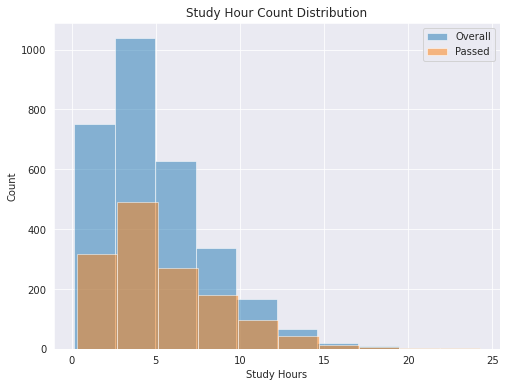

In [256]:
# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
plt.hist(df['hours_studied'], bins=10, alpha=0.5, label='Overall')
plt.hist(passing_df['hours_studied'], bins=10, alpha=0.5, label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('Count')
plt.title('Study Hour Count Distribution')
plt.legend()
plt.show()


Average Study Hours for People Who Passed: 5.468334695578223


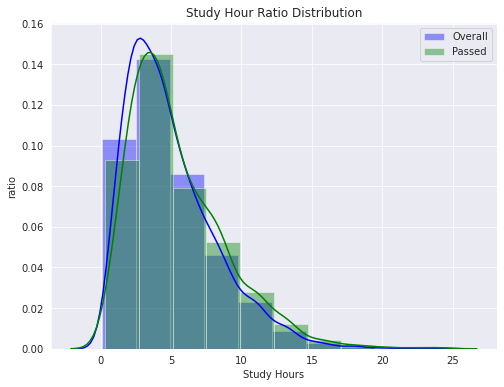

In [257]:
import seaborn as sns

# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
sns.distplot(df['hours_studied'].dropna(), bins=10, color='blue', label='Overall')
sns.distplot(passing_df['hours_studied'].dropna(), bins=10, color='green', label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('ratio')
plt.title('Study Hour Ratio Distribution')
plt.legend()
plt.show()


Average Study Hours for People Who Passed: 5.468334695578223


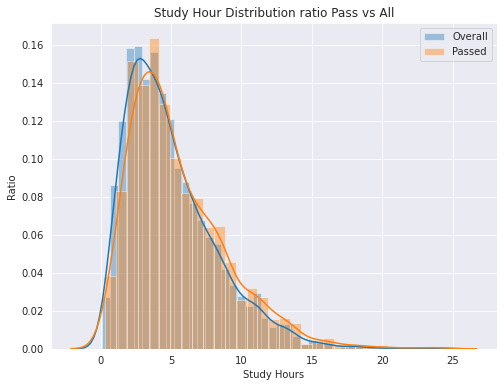

In [260]:
# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
sns.distplot(df['hours_studied'].dropna(), label='Overall')
sns.distplot(passing_df['hours_studied'].dropna(), label='Passed')
plt.xlabel('Study Hours')
plt.ylabel('Ratio')
plt.title('Study Hour Distribution ratio Pass vs All')
plt.legend()
plt.show()

Average Study Hours for People Who Passed: 5.468334695578223
Average Study Hours for People Who didn't Pass: 4.517177023506747


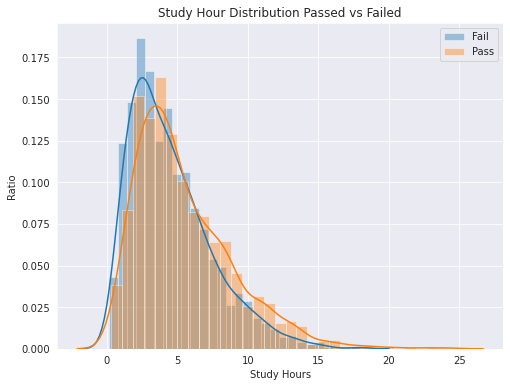

In [258]:

# Average study hours for people who passed
passing_avg_study_hours = passing_df['hours_studied'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Average study hours for people who didn't pass
passing_avg_study_hours = non_passing_df['hours_studied'].mean()
print("Average Study Hours for People Who didn't Pass:", passing_avg_study_hours)

# Study hour distribution for people who passed vs overall distribution
plt.figure(figsize=(8, 6))
sns.distplot(non_passing_df['hours_studied'].dropna(), label='Fail')
sns.distplot(passing_df['hours_studied'].dropna(), label='Pass')
plt.xlabel('Study Hours')
plt.ylabel('Ratio')
plt.title('Study Hour Distribution Passed vs Failed')
plt.legend()
plt.show()

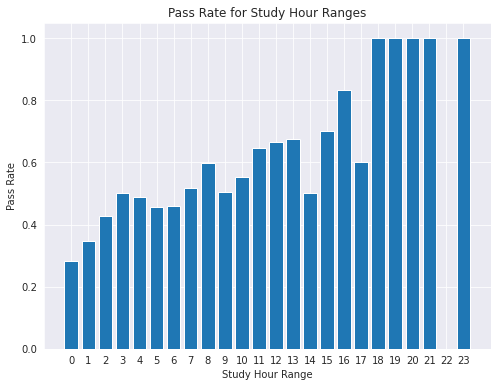

Correlation between Study Hours and Pass: 0.1482318138367112


In [273]:
# Find the lowest and highest study_hour_range
lowest_hour_range = int(df['hours_studied'].min())
highest_hour_range = int(df['hours_studied'].max())

# Create study hour ranges dynamically
study_hour_ranges = list(range(lowest_hour_range, highest_hour_range + 1, 1))

# Calculate pass rate for each study hour range
pass_rates = []
for i in range(len(study_hour_ranges) - 1):
    lower_bound = study_hour_ranges[i]
    upper_bound = study_hour_ranges[i + 1]
    pass_rate = df[(df['hours_studied'] >= lower_bound) & (df['hours_studied'] < upper_bound)]['pass'].mean()
    pass_rates.append(pass_rate)

# Plot pass rates for study hour ranges
plt.figure(figsize=(8, 6))
plt.bar(range(len(study_hour_ranges) - 1), pass_rates)
plt.xlabel('Study Hour Range')
plt.ylabel('Pass Rate')
plt.title('Pass Rate for Study Hour Ranges')
plt.xticks(range(len(study_hour_ranges) - 1), study_hour_ranges[:-1])
plt.show()

# Correlation between study hours and people who passed
correlation = df['hours_studied'].corr(df['pass'])
print("Correlation between Study Hours and Pass:", correlation)


In [274]:
# Assuming 'df' is your pandas DataFrame containing the dataset
# Define the study hour ranges
lowest_hour_range = int(df['hours_studied'].min())
highest_hour_range = int(df['hours_studied'].max())
study_hour_ranges = list(range(lowest_hour_range, highest_hour_range + 1, 1))

# Create study hour intervals and count the occurrences
hour_range_counts = pd.cut(df['hours_studied'], bins=study_hour_ranges, right=False).value_counts()

# Print the counts
print(hour_range_counts)

[2, 3)      500
[3, 4)      446
[4, 5)      402
[1, 2)      342
[5, 6)      301
[6, 7)      229
[7, 8)      186
[8, 9)      144
[0, 1)      120
[9, 10)     101
[10, 11)     76
[11, 12)     65
[13, 14)     34
[12, 13)     33
[14, 15)     10
[15, 16)     10
[16, 17)      6
[17, 18)      5
[18, 19)      3
[19, 20)      1
[20, 21)      1
[21, 22)      1
[23, 24)      1
[22, 23)      0
Name: hours_studied, dtype: int64


Optimum Study Hours: 0.3226619002445695
Correlation between Study Hours and Pass: 0.14823181383671105


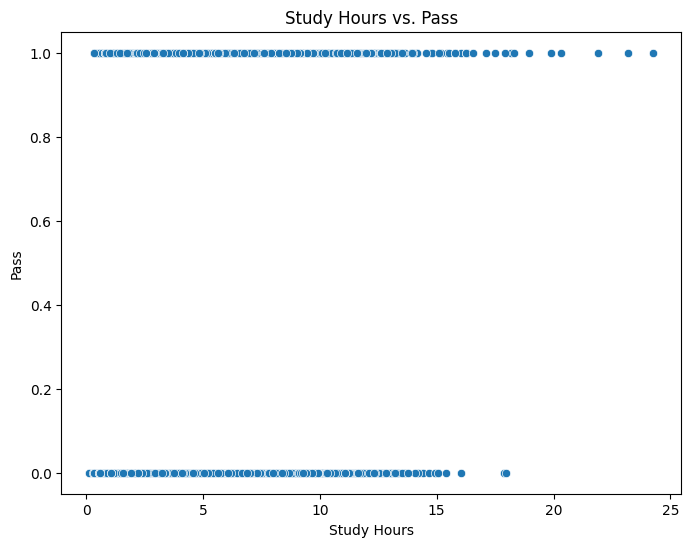

In [ ]:
import numpy as np
import seaborn as sns

# Optimum study hours
optimum_hours = df.groupby('hours_studied')['pass'].mean().idxmax()
print("Optimum Study Hours:", optimum_hours)

# Correlation between study hours and people who passed
correlation = df['hours_studied'].corr(df['pass'])
print("Correlation between Study Hours and Pass:", correlation)

# Scatter plot of study hours vs. pass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='hours_studied', y='pass')
plt.xlabel('Study Hours')
plt.ylabel('Pass')
plt.title('Study Hours vs. Pass')
plt.show()


### Age distribution

Average Age for People Who Passed: 26.65139186295503


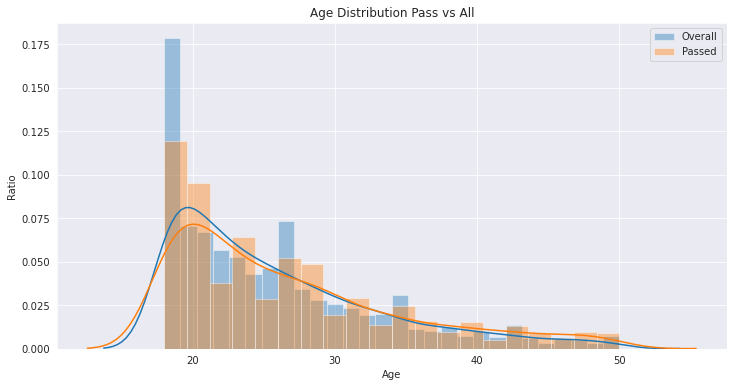

In [264]:
# Average age for people who passed
passing_avg_age = passing_df['age'].mean()
print("Average Age for People Who Passed:", passing_avg_age)

# Age distribution for people who passed vs overall distribution
plt.figure(figsize=(12, 6))
sns.distplot(df['age'].dropna(), label='Overall')
sns.distplot(passing_df['age'].dropna(), label='Passed')
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Age Distribution Pass vs All')
plt.legend()

Average Study Hours for People Who Passed: 26.65139186295503
Average Study Hours for People Who didn't Pass: 25.191744840525327


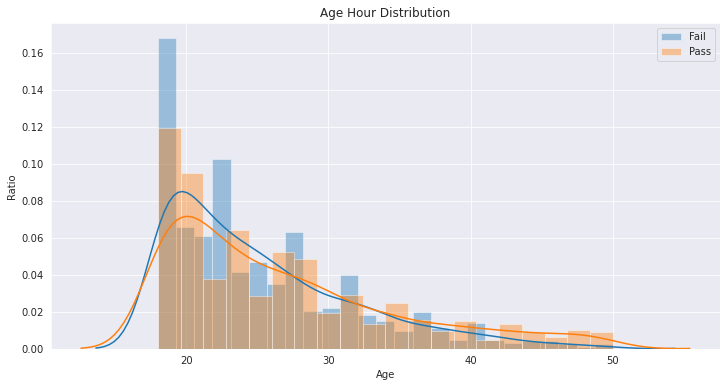

In [263]:
# Average age for people who passed
passing_avg_study_hours = passing_df['age'].mean()
print("Average Study Hours for People Who Passed:", passing_avg_study_hours)

# Average age for people who didn't pass
passing_avg_study_hours = non_passing_df['age'].mean()
print("Average Study Hours for People Who didn't Pass:", passing_avg_study_hours)

# Age distribution for people who passed vs overall distribution
plt.figure(figsize=(12, 6))

sns.distplot(non_passing_df['age'].dropna(), label='Fail')
sns.distplot(passing_df['age'].dropna(), label='Pass')
plt.xlabel('Age')
plt.ylabel('Ratio')
plt.title('Age Hour Distribution')
plt.legend()
plt.show()

Optimum age: 49
Correlation between age and Pass: 0.09908941946428926


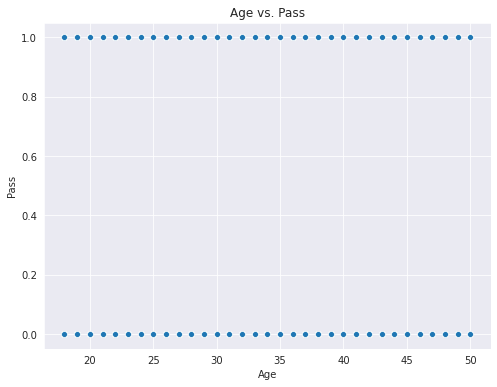

In [245]:
# Optimum age
optimum_hours = df.groupby('age')['pass'].mean().idxmax()
print("Optimum age:", optimum_hours)

# Correlation between age and people who passed
correlation = df['age'].corr(df['pass'])
print("Correlation between age and Pass:", correlation)

# Scatter plot of age vs. pass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='pass')
plt.xlabel('Age')
plt.ylabel('Pass')
plt.title('Age vs. Pass')
plt.show()

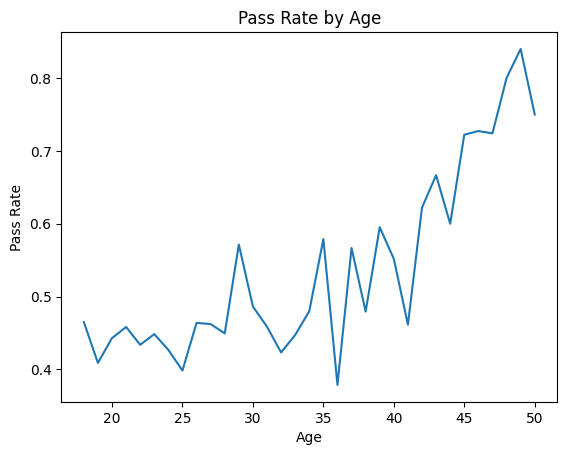

In [ ]:
# Group the dataset by age and calculate the pass rate for each age group
pass_rate_by_age = df.groupby('age')['pass'].mean()

# Plot the pass rate as a function of age
plt.plot(pass_rate_by_age.index, pass_rate_by_age.values)
plt.xlabel('Age')
plt.ylabel('Pass Rate')
plt.title('Pass Rate by Age')
plt.show()


### Dojo_class and Test_prep

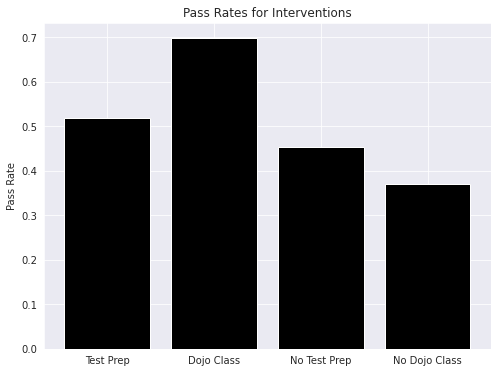

In [275]:
# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Plotting the pass rates
labels = ['Test Prep', 'Dojo Class', 'No Test Prep', 'No Dojo Class']
pass_rates = [prep_pass_rate, dojo_pass_rate, no_prep_pass_rate, no_dojo_pass_rate]
plt.figure(figsize=(8, 6))
plt.bar(labels, pass_rates, color= 'black')
plt.ylabel('Pass Rate')
plt.title('Pass Rates for Interventions')
plt.show()


In [280]:
df.head(2)

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,1,4,4,20,Juurou,Hayashi,10.578594,True,False,True,NaN
1,1,4,4,22,Ryūji,Yamasaki,7.814520,False,False,True,NaN


In [292]:
# Filter the DataFrame for rows where test_prep is True
filtered_df = df[df['test_prep'] == True]

# Calculate the pass rate for the filtered DataFrame
pass_rate_test_prep = filtered_df['pass'].value_counts(normalize=True)[1] * 100

# Print the pass rate
print("Pass rate for people whoo took a test_prep: {:.2f}%".format(pass_rate_test_prep))


Pass rate for people whoo took a test_prep: 51.87%


In [289]:
# Filter the DataFrame for rows where dojo_class is True
filtered_df = df[df['dojo_class'] == True]

# Calculate the pass rate for the filtered DataFrame
pass_rate_dojo_class = filtered_df['pass'].value_counts(normalize=True)[1] * 100

# Print the pass rate
print("Pass rate for people who took a dojo class: {:.2f}%".format(pass_rate_dojo_class))


Pass rate for people who took a dojo class: 69.84%


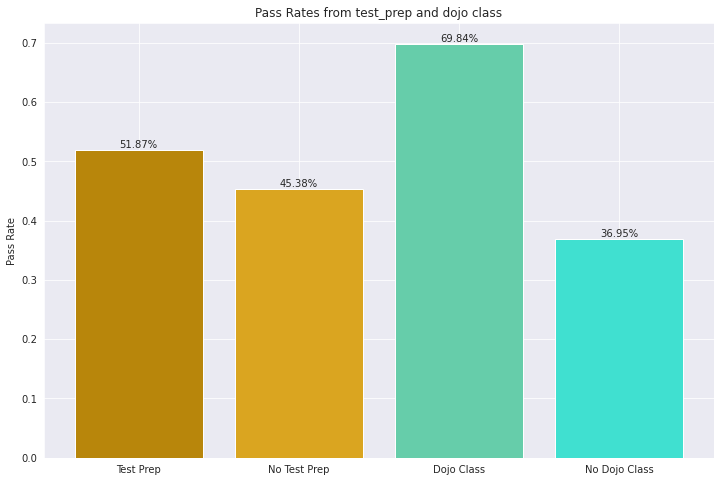

In [222]:
plt.figure(figsize=(12,8))

# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Plotting the pass rates
labels = ['Test Prep',  'No Test Prep','Dojo Class', 'No Dojo Class']
pass_rates = [prep_pass_rate, no_prep_pass_rate, dojo_pass_rate,  no_dojo_pass_rate]
colors = ['darkgoldenrod', 'goldenrod','mediumaquamarine', 'turquoise']

plt.bar(labels, pass_rates, color=colors)
plt.ylabel('Pass Rate')
plt.title('Pass Rates from test_prep and dojo class')

# Add percentage values on the bar plot
for i in range(len(labels)):
    plt.text(labels[i], pass_rates[i], f'{pass_rates[i]*100:.2f}%', ha='center', va='bottom')

plt.show()


In [ ]:
# Pass rate for individuals who took the test prep course
prep_pass_rate = df[df['test_prep'] == 1]['pass'].mean()

# Pass rate for individuals who attended the Dojo class
dojo_pass_rate = df[df['dojo_class'] == 1]['pass'].mean()

# Pass rate for individuals who did not take the test prep course
no_prep_pass_rate = df[df['test_prep'] == 0]['pass'].mean()

# Pass rate for individuals who did not attend the Dojo class
no_dojo_pass_rate = df[df['dojo_class'] == 0]['pass'].mean()

# Calculate the percentage increase in pass rates for each intervention
prep_percentage_increase = (prep_pass_rate - no_prep_pass_rate) / no_prep_pass_rate * 100
dojo_percentage_increase = (dojo_pass_rate - no_dojo_pass_rate) / no_dojo_pass_rate * 100

# Print the results
print("Marginal contribution in Pass Rates:")
print("Test Prep:", prep_percentage_increase)
print("Dojo Class:", dojo_percentage_increase)


Percentage Increase in Pass Rates:
Test Prep: 14.300075341024435
Dojo Class: 88.99252569293056


### Country and Lang.

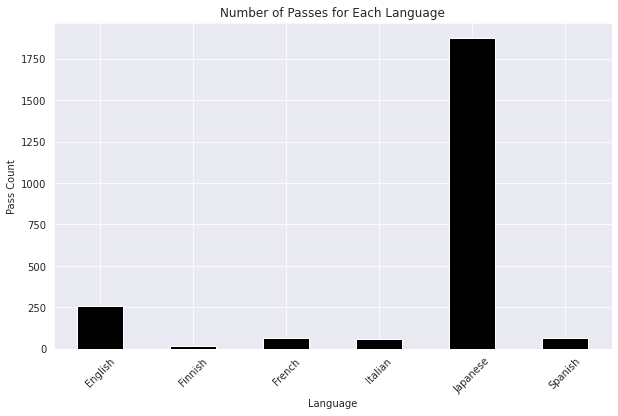

lang
English     0.110064
Finnish     0.007281
French      0.026981
Italian     0.026124
Japanese    0.802998
Spanish     0.026552
dtype: float64


In [231]:
# Calculate pass ratio for each language
pass_counts = df[df['pass'] == True].groupby('lang').size()
pass_ratio = df.groupby('lang')['pass'].apply(lambda x: (x == True).mean())

# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_counts.plot(kind='bar',colormap = 'Greys_r')
plt.title('Number of Passes for Each Language')
plt.xlabel('Language')
plt.ylabel('Pass Count')
plt.xticks(rotation=45)
plt.show()
print(pass_counts/len(passing_df))

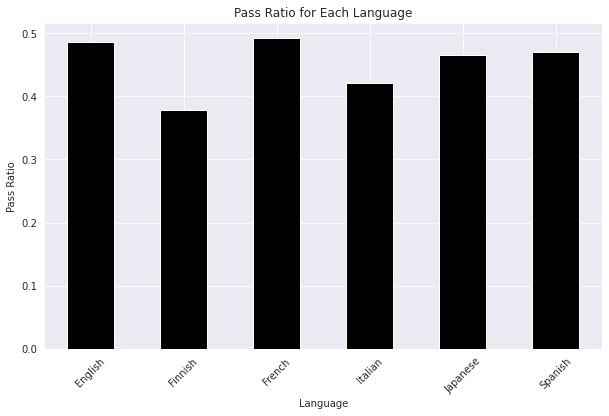

lang
English     0.486742
Finnish     0.377778
French      0.492188
Italian     0.420690
Japanese    0.466186
Spanish     0.469697
Name: pass, dtype: float64


In [230]:
pass_ratio = df.groupby('lang')['pass'].apply(lambda x: (x == True).mean())

# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_ratio.plot(kind='bar',colormap = 'Greys_r')
plt.title('Pass Ratio for Each Language')
plt.xlabel('Language')
plt.ylabel('Pass Ratio')
plt.xticks(rotation=45)
plt.show()
print(pass_ratio)

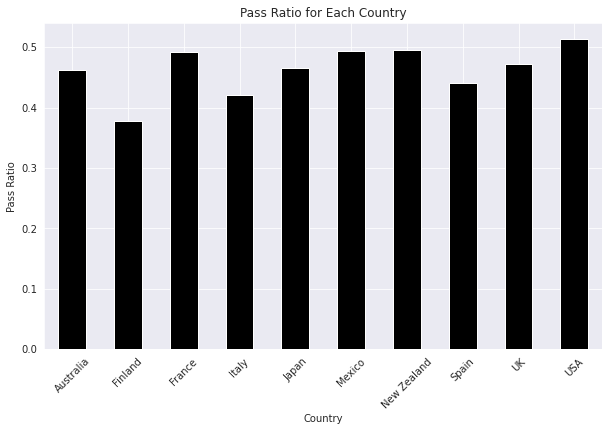

country
Australia      0.462687
Finland        0.377778
France         0.492188
Italy          0.420690
Japan          0.466186
Mexico         0.493151
New Zealand    0.496183
Spain          0.440678
UK             0.471545
USA            0.514286
Name: pass, dtype: float64


In [229]:
pass_ratio = df.groupby('country')['pass'].apply(lambda x: (x == True).mean())


# Plot the pass ratio
plt.figure(figsize=[10, 6])
pass_ratio.plot(kind='bar', colormap = 'Greys_r' )
plt.title('Pass Ratio for Each Country')
plt.xlabel('Country')
plt.ylabel('Pass Ratio')
plt.xticks(rotation=45)
plt.show()
print(pass_ratio)

In [236]:
df.keys()

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes'],
      dtype='object')

### Further Analysis

In [239]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['pass'])

# Perform chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square value:", chi2)
print("p-value:", p_value)


Chi-square value: 232.31470630588373
p-value: 1.8644660635947317e-52


In [ ]:
import plotly.express as px
fig=px.scatter_matrix(df,
    dimensions=['sex', 'lang','age', 'hours_studied', 'dojo_class','test_prep'],
    color="pass")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",
)

fig.show()

In [234]:
fig=px.scatter_matrix(df,
    dimensions=['age', 'hours_studied'],
    color="pass")
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white",
)

fig.show()

<AxesSubplot:title={'center':'hours studied and age for each class'}, xlabel='hours_studied', ylabel='age'>

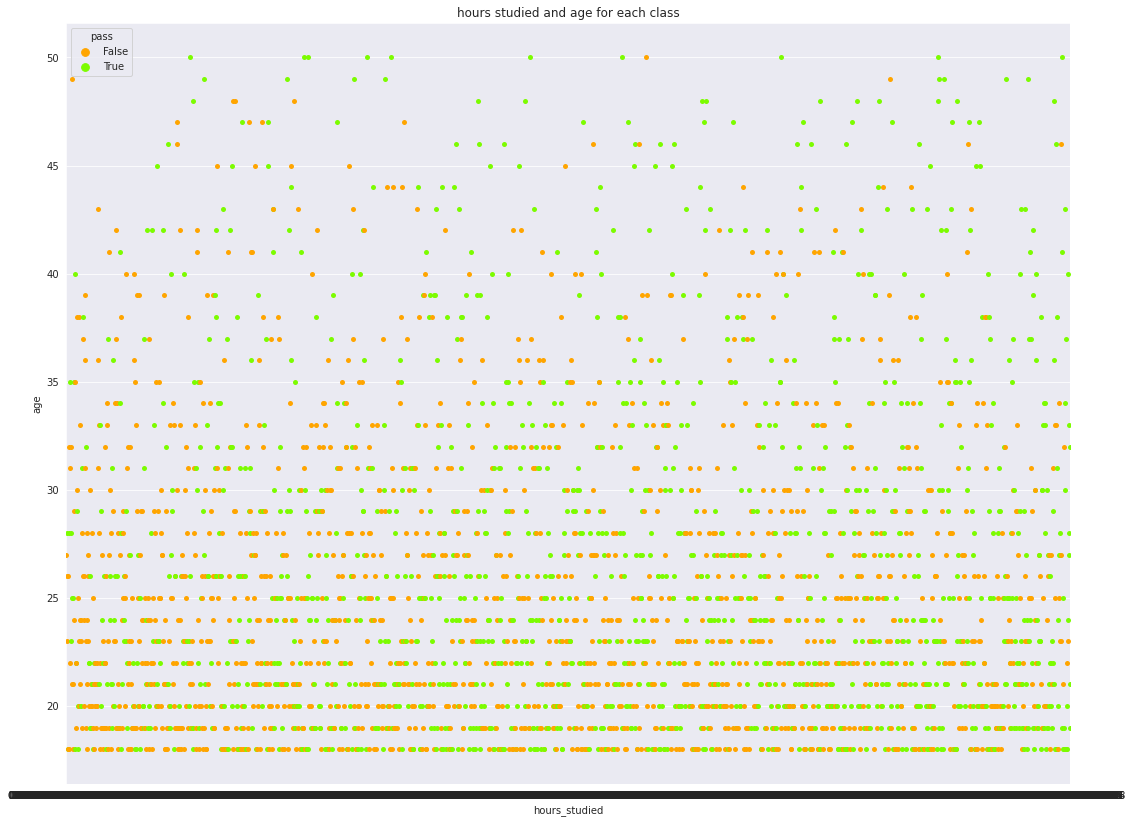

In [ ]:
#Plot Size
plt.figure(figsize=(18,14))
#Plot Title
plt.title("Studied Hours and age for each class")
#Plot
sns.swarmplot(x=df["hours_studied"],y=df["age"], hue=df["pass"],palette=("orange","lawngreen"))

## feature importance analysis

In [158]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


data = df.drop(['first', 'last', 'notes'], axis=1)


#feature engineering
from sklearn.preprocessing import LabelEncoder

gender_mapping= {'Male': 1, 'Female': 0}
data['sex'] = data['sex'].map(gender_mapping)
# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# List of columns to apply Label Encoding
columns_to_encode = ['country', 'lang']

# Apply Label Encoding to the specified columns
for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])

# Replace missing values with the mean
#mean_hours_studied = data['hours_studied'].mean()
#data['hours_studied'] = data['hours_studied'].fillna(mean_hours_studied)

data = data.dropna()
X = data.drop('pass', axis=1)
y = data['pass']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)
print(f"RF train accuracy: {rf.score(X, y):.3f}")


         Feature  Importance
4  hours_studied    0.556373
3            age    0.198200
5     dojo_class    0.103668
0            sex    0.061811
2        country    0.036752
1           lang    0.025875
6      test_prep    0.017320
RF train accuracy: 1.000


In [159]:
len(data)

3018

## 3.

## 4.

Model Accuracy: 0.659
Classification Report:
               precision    recall  f1-score   support

       False       0.65      0.72      0.68       508
        True       0.67      0.60      0.63       492

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.66      0.66      0.66      1000



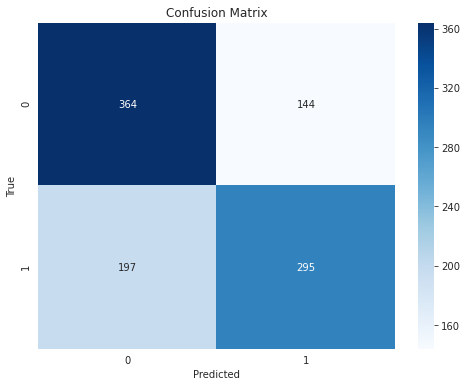

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("data/raw/woven_data.tsv", sep='\t')

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)


# Drop rows with NaN values
#df = df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = RandomForestClassifier(n_estimators= 1000)
model = HistGradientBoostingClassifier(max_iter= 200,min_samples_leaf=30)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df = pd.read_csv("data/raw/woven_data.tsv", sep='\t')

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)



y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

## Training and testing different models

  * `models.append(('Logistic Regression',LogisticRegression(solver='liblinear',max_iter=500)))`
  * `models.append(('Decision Tree (CART)', DecisionTreeClassifier()))`
  * `models.append(('SVM', SVC(kernel='poly', random_state=None, gamma='scale', probability=True)))`
  * `models.append(('K-NN', KNeighborsClassifier()))`
  * `models.append(('Ada Boost Classifier', AdaBoostClassifier()))`
  * `models.append(('Bagging Classifier', BaggingClassifier(n_estimators=50)))`
  * `models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100,warm_start=True)))`
  * `models.append(('MLP Classifier', MLPClassifier(max_iter=500,)))`
  * `models.append(('Gaussian naive_bayes', GaussianNB()))`

In [ ]:
# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)

df= df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
# Machine Learning Libraries
import statsmodels.api as sm
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier






    # confusion matrix
def graphs_cm (name, y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  lr_asr = accuracy_score(y_test, y_pred)
  print("Accuracy:",name, lr_asr, "\n")
  print(classification_report(y_test, y_pred))

  fig = plt.figure()
  ax1 = fig.add_subplot(111)
  sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size": 25}, ax=ax1)
  ax1.set_title(name)
  ax1.set_ylabel("Actual")
  ax1.set_xlabel("Predicted")
  plt.show()

# ROC AUC
def roc_auc(name, y_test,y_pred):
  skplt.metrics.plot_roc(y_test, y_pred, title = name)
  plt.show()

#training function for cross validation
def train_test(X_train,y_train,X_test,y_test, models):
  col_list = []

  for col in X_train:
      if col != "label":
          col_list.append(col)
  for name, model in models:
      globals()[model]= model.fit(X_train, y_train)
      y_pred = globals()[model].predict(X_test)
      globals()[name]=name
      nom=[]
      nom.append(name)

      #print("%s -> ACC: %%%.2f" % (globals()[name], metrics.accuracy_score(y_test, y_pred) * 100))
      #print(classification_report(y_test, y_pred))
      graphs_cm(globals()[name],y_test,y_pred)
      #graphs_variable_importance(globals()[name], col_list)

def moderu():
  models = []
  models.append(('Logistic Regression', LogisticRegression(solver='liblinear',max_iter=500)))
  models.append(('Decision Tree (CART)', DecisionTreeClassifier()))
  models.append(('SVM', SVC(kernel='poly', random_state=None, gamma='scale', probability=True)))
  models.append(('K-NN', KNeighborsClassifier()))
  models.append(('Ada Boost Classifier', AdaBoostClassifier()))
  models.append(('Bagging Classifier', BaggingClassifier(n_estimators=50)))
  models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=100,warm_start=True)))
  models.append(('MLP Classifier', MLPClassifier(max_iter=500)))
  models.append(('Gaussian naive_bayes', GaussianNB()))

  return models


from sklearn.model_selection import cross_val_score
models = moderu()
results=pd.DataFrame(columns=['model', 'score', 'std score'])
for name,model in models:
  scores = cross_val_score(model, X_train, y_train, cv=5)
  #y_pred = model.predict(X_test)

# scores

# The mean score
  print(name,"Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
  results.loc[len(results)] =[name,scores.mean(),scores.std() * 2 ]
  #graphs_cm(name,y_test,y_pred)

print(results)



Logistic Regression Accuracy: 0.66 (+/- 0.04)
Decision Tree (CART) Accuracy: 0.60 (+/- 0.04)
SVM Accuracy: 0.62 (+/- 0.02)
K-NN Accuracy: 0.59 (+/- 0.04)
Ada Boost Classifier Accuracy: 0.65 (+/- 0.06)
Bagging Classifier Accuracy: 0.62 (+/- 0.02)
Random Forest Classifier Accuracy: 0.63 (+/- 0.03)
MLP Classifier Accuracy: 0.68 (+/- 0.06)
Gaussian naive_bayes Accuracy: 0.66 (+/- 0.05)
                      model     score  std score
0       Logistic Regression  0.663199   0.041255
1      Decision Tree (CART)  0.601482   0.039032
2                       SVM  0.616399   0.015217
3                      K-NN  0.594437   0.042766
4      Ada Boost Classifier  0.649945   0.060188
5        Bagging Classifier  0.621377   0.021719
6  Random Forest Classifier  0.631318   0.032254
7            MLP Classifier  0.680177   0.057304
8      Gaussian naive_bayes  0.657399   0.052296


In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import pickle

"""

# Select the relevant features and target variable
features = ['sex', 'lang', 'country', 'age', 'hours_studied', 'dojo_class', 'test_prep']
target = 'pass'

# Convert 'sex' attribute to numerical values using label encoding
sex_mapping = {'Male': 1, 'Female': 0}  # Define the mapping for each category
df['sex'] = df['sex'].map(sex_mapping)

# Convert 'lang', 'country', 'first', and 'last' attributes to numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['lang', 'country'], drop_first=True)

df = df.drop(['first', 'last', 'notes'], axis=1)


# Drop rows with NaN values
df = df.dropna()

y = df['pass']
X = df.drop(['pass'], axis = 1)


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""

# Define a dictionary to store the results
results = {}

# Define the models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=150,),
    'Logistic Regression': LogisticRegression(max_iter = 500),
    'Decision Tree': DecisionTreeClassifier(max_depth=20),
    'Ada Boost': AdaBoostClassifier(n_estimators=150),
    'Bagging classifier': BaggingClassifier(n_estimators=150),
    'Gaussian Naive Bayes': GaussianNB(),
    'MLP Classifier': MLPClassifier(max_iter=500)

}

# Iterate over the models
for model_name, model in models.items():
    # Perform cross-validation and calculate accuracy
    scores = cross_val_score(model, X, y, cv=10)
    results[model_name] = scores

# Create a DataFrame to store the results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df.mean())

# Identify the best performing model
best_model = results_df.mean().idxmax()
print(f"Best Performing Model is : {best_model} ")

Random Forest           0.628557
Logistic Regression     0.665986
Decision Tree           0.596077
Ada Boost               0.655059
Bagging classifier      0.617618
Gaussian Naive Bayes    0.660693
MLP Classifier          0.681907
dtype: float64
Best Performing Model is : MLP Classifier 


Model Accuracy: 0.6887417218543046
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.74      0.71       309
        True       0.70      0.63      0.66       295

    accuracy                           0.69       604
   macro avg       0.69      0.69      0.69       604
weighted avg       0.69      0.69      0.69       604



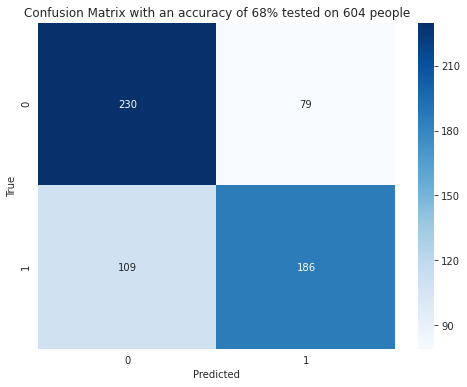

In [252]:
import pickle

model = MLPClassifier(max_iter=500)
model.fit(X_train, y_train)
# Make predictions on the testing set
y_pred = model.predict(X_test)

with open('models/MLPClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix with an accuracy of {int(accuracy*100)}% tested on {len(X_test)} people')
plt.show()


### PCA

In [322]:
df.keys()

Index(['sex', 'lang', 'country', 'age', 'first', 'last', 'hours_studied',
       'dojo_class', 'test_prep', 'pass', 'notes'],
      dtype='object')

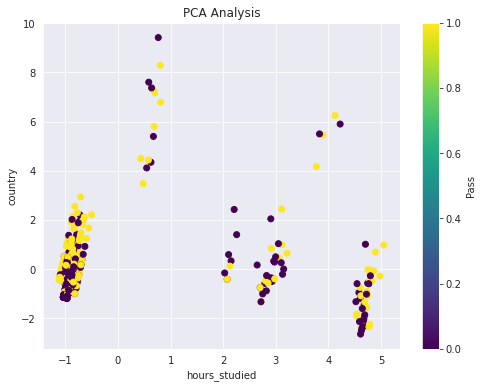

In [325]:
# Columns to one-hot encode
columns_to_encode = ['hours_studied', 'country']


# Separate the 'pass' attribute
data=df
data=data.dropna()
pass_label = data['pass']
data = data.drop('pass', axis=1)



gender_mapping= {'Male': 1, 'Female': 0}
#data['sex'] = data['sex'].map(gender_mapping)
columns_to_remove = ['first', 'last', 'notes']
data = data.drop(columns_to_remove, axis=1)

from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(drop='first')

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(df[columns_to_encode]).toarray()

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the original DataFrame without the columns to encode with the encoded DataFrame
data = pd.concat([data.drop(columns_to_encode, axis=1), encoded_df], axis=1)


data=data.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)



# Perform PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio of each principal component
#for i, explained_variance in enumerate(explained_variance_ratio):
#    print(f"Explained variance ratio of PC{i+1}: {explained_variance:.4f}")
#

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=pass_label, cmap='viridis')
plt.xlabel(columns_to_encode[0])
plt.ylabel(columns_to_encode[1])
plt.title('PCA Analysis')
plt.colorbar(label='Pass')
plt.show()


In [310]:
data=df

from sklearn.preprocessing import LabelEncoder

# Create an instance of the LabelEncoder
encoder = LabelEncoder()

# List of columns to apply Label Encoding
columns_to_encode = ['age', 'country']

# Apply Label Encoding to the specified columns
for column in columns_to_encode:
    data[column] = encoder.fit_transform(data[column])

data.head()

,sex,lang,country,age,first,last,hours_studied,dojo_class,test_prep,pass,notes
0,Male,Japanese,4,2,Juurou,Hayashi,10.578594,True,False,True,NaN
1,Male,Japanese,4,4,Ryūji,Yamasaki,7.814520,False,False,True,NaN
2,Male,Japanese,4,9,Ryūnosuke,Inoue,4.213682,False,False,True,NaN
3,Male,Japanese,4,6,Shin,Kobayashi,NaN,False,False,True,NaN
4,Female,Japanese,4,3,Ran,Ono,3.248907,False,False,False,NaN
